In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
books=pd.read_csv(r"C:\Users\Naveen\OneDrive\Desktop\books.csv")

In [3]:
books.head(2)

book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0       15              48855         48855  3532896          710  553296981   
1       40              19501         19501  3352398          185  143038419   

         isbn13                                            authors  \
0  9.780550e+12  Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...   
1  9.780140e+12                                  Elizabeth Gilbert   

   original_publication_year  \
0                       1947   
1                       2006   

                                      original_title  ... work_ratings_count  \
0  Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...  ...            2024493   
1  Eat, pray, love: one woman's search for everyt...  ...            1206597   

  work_text_reviews_count  ratings_1  ratings_2  ratings_3  ratings_4  \
0                   20825      45225      91270     355756     656870   
1                   49714     100373     149549     310212     332191   

   ratings_5                                          image_url  \
0     875372  https://images.gr-assets.com/books/1358276407m...   
1     314272  https://images.gr-assets.com/books/1503066414m...   

                                     small_image_url  NonEnglish  
0  https://images.gr-assets.com/books/1358276407s...           0  
1  https://images.gr-assets.com/books/1503066414s...           0  

[2 rows x 24 columns]

In [4]:
print("Number of rows:", books.shape[0])
print("Number of columns:",books.shape[1])

Number of rows: 399
Number of columns: 24


In [5]:
without_original= books[books['original_title'].isnull()]
print("Number of books without an original title:", len(without_original))

Number of books without an original title: 36


In [6]:
books_cleaned = books.dropna(subset=['original_title'])
uniquebooks_count = books_cleaned['book_id'].nunique()
print("Number of unique books based on 'book_id':", uniquebooks_count)

Number of unique books based on 'book_id': 363


In [7]:
average_rating = books['average_rating'].mean()
print("Average rating of all books in the dataset:", average_rating)

Average rating of all books in the dataset: 3.9837844611528843


In [8]:
bookspublished = books[books['original_publication_year'] == 2000]
bookspublished_2000 = len(bookspublished)
print("Number of books published in the year 2000:", bookspublished_2000)

Number of books published in the year 2000: 8


In [9]:
max_ratings_book = books.loc[books['work_ratings_count'].idxmax()]
print("Book with the maximum number of ratings:")
print(max_ratings_book['title'])

Book with the maximum number of ratings:
The Diary of a Young Girl


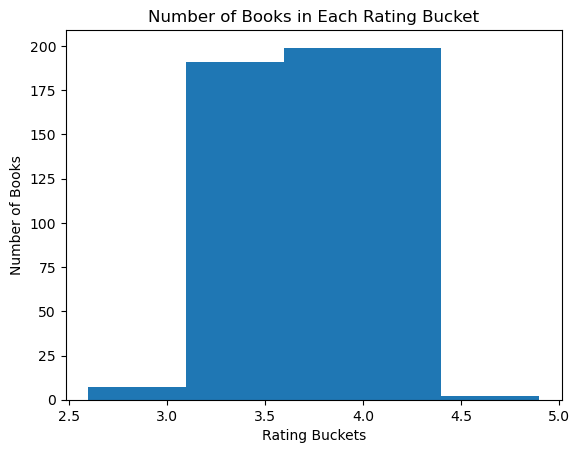

In [10]:
books['rating_bucket'] = np.floor(books['average_rating'] * 2) / 2
rating_counts = books['rating_bucket'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts)
plt.xlabel('Rating Buckets')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()